In [114]:
from skibidi_face_detector.dataset.small_celebrities import train_loader, num_classes, augment
from skibidi_face_detector.face import align_faces, detect_faces, assess_quality 
import matplotlib.pyplot as plt
import einops

print(f'{num_classes = }')

num_classes = 103


tensor([19])

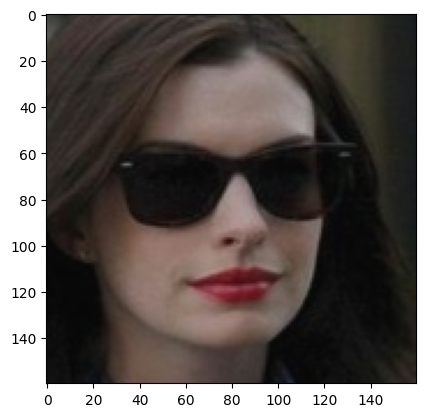

In [115]:
example = next(iter(train_loader))
image = augment(example['image'])
plt.imshow(einops.rearrange(image, '1 c h w -> h w c'))
example['label']

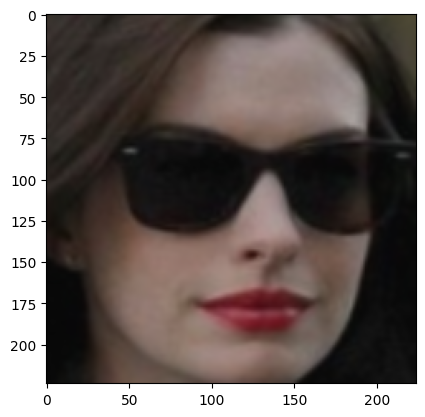

[1,
 [{'confidence': np.float64(0.9995220899581909),
   'roll': np.float64(-3.6522227803063356),
   'pitch': np.float64(-4.1269106067623795),
   'yaw': np.float64(29.791563275434243)}]]

In [116]:
face_detections = detect_faces(image)

image_ok, image_message, faces_ok_and_messages, qualities = assess_quality(image, face_detections, single_face_only=False, min_confidence=0.97)
if not image_ok:
    print(image_message)
else:
    for face_image, (face_ok, face_message) in zip(align_faces(image, face_detections), faces_ok_and_messages):
        if not face_ok:
            print(face_message)
        else:
            plt.imshow(einops.rearrange(face_image, 'c h w -> h w c'))
            plt.show()

qualities